In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sonar-mine-dataset/sonar data.csv


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn
import warnings
warnings.filterwarnings('ignore')

# using ANN to classify dataset for sonar to see if the data is rock or mine

In [3]:
df=pd.read_csv('/kaggle/input/sonar-mine-dataset/sonar data.csv')
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [4]:
df.shape

(207, 61)

In [5]:
df.isna().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

In [6]:
df['R'].value_counts()

M    111
R     96
Name: R, dtype: int64

# split the data to independent and dependent

In [7]:
X=df.drop('R',axis=1)
y=df['R']

# converting categorical data to numerical

In [8]:
y=pd.get_dummies(y,drop_first=True)
y.head()

,R
0,1
1,1
2,1
3,1
4,1


In [9]:
y.value_counts()

R
0    111
1     96
dtype: int64

# split the data to train and test

In [10]:
from sklearn.model_selection import train_test_split
#make random shuffle and balancing for traind and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,stratify=y,random_state=42,shuffle=True)

In [11]:
X_train.shape,X_test.shape

((155, 60), (52, 60))

# using ML Algorithms (RandomForest)

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
forest=RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
pred=forest.predict(X_test).reshape(-1)

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        37
           1       0.62      1.00      0.77        15

    accuracy                           0.83        52
   macro avg       0.81      0.88      0.82        52
weighted avg       0.89      0.83      0.83        52



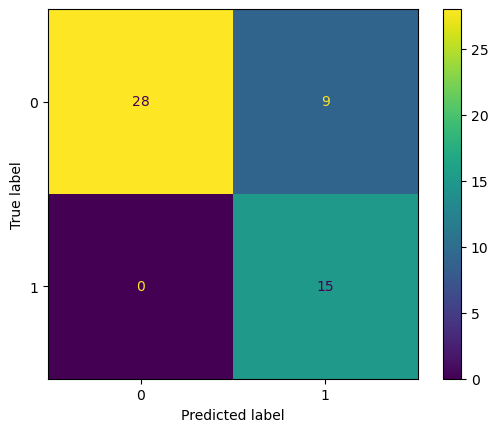

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix(pred,y_test))
disp=disp.plot()
print(classification_report(pred,y_test))

In [12]:
import tensorflow as tf
from tensorflow import keras

# using ANN model and drop out some data to avoiding overfitting

In [32]:
model=keras.Sequential([keras.layers.Dense(60,input_dim=60,activation='relu'),keras.layers.Dropout(.2),keras.layers.Dense(60,activation='relu'),keras.layers.Dropout(.2),keras.layers.Dense(30,activation='relu'),keras.layers.Dropout(.2),keras.layers.Dense(1,activation='sigmoid')])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
20/20 [==============================] - 2s 4ms/step - loss: 0.6990 - accuracy: 0.5097
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6770 - accuracy: 0.5935
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6793 - accuracy: 0.5484
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.6065
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6576 - accuracy: 0.6710
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6347 - accuracy: 0.7032
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6298 - accuracy: 0.6710
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5901 - accuracy: 0.7419
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5763 - accuracy: 0.7226
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5682 - accuracy: 0.7032
Epoch 11/

In [33]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 1.2015 - accuracy: 0.7308


[1.2014784812927246, 0.7307692170143127]

In [34]:
y_pred=model.predict(X_test).reshape(-1)
y_pred=np.round(y_pred)

2/2 [==============================] - 0s 5ms/step


# using confusion matrix to see accuracy

              precision    recall  f1-score   support

         0.0       0.93      0.68      0.79        38
         1.0       0.50      0.86      0.63        14

    accuracy                           0.73        52
   macro avg       0.71      0.77      0.71        52
weighted avg       0.81      0.73      0.75        52



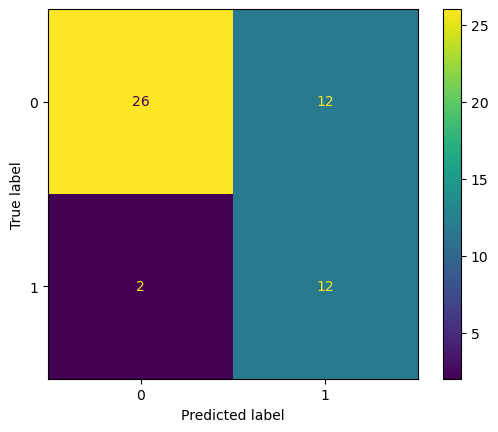

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix(y_pred,y_test))
disp=disp.plot()
print(classification_report(y_pred,y_test))